Titanic Survival Prediction Case Study

In [33]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [34]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.5+ KB


In [36]:
# Encode
le = LabelEncoder()
data.Sex = le.fit_transform(data['Sex'])
data.Embarked = le.fit_transform(data['Embarked'])

In [37]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [38]:
data = data.drop(columns = ['Cabin', 'PassengerId', 'Name', 'Ticket'])
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [39]:
feature_cols = ['Survived','Pclass','Sex', 'Age', 'SibSp','Parch','Fare','Embarked' ]
X = data[feature_cols]
X.drop(columns=['Age'],axis=1,inplace=True)
X

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,1,1,0,7.2500,2
1,1,1,0,1,0,71.2833,0
2,1,3,0,0,0,7.9250,2
3,1,1,0,1,0,53.1000,2
4,0,3,1,0,0,8.0500,2
...,...,...,...,...,...,...,...
884,0,2,1,0,0,13.0000,2
885,1,1,0,0,0,30.0000,2
886,0,3,0,1,2,23.4500,2
887,1,1,1,0,0,30.0000,0


In [40]:
y = data[['Pclass']]

y

,Pclass
0,3
1,1
2,3
3,1
4,3
...,...
884,2
885,1
886,3
887,1


In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.2,
                                                random_state=3,)

In [42]:
X_train.head()
X

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,1,1,0,7.2500,2
1,1,1,0,1,0,71.2833,0
2,1,3,0,0,0,7.9250,2
3,1,1,0,1,0,53.1000,2
4,0,3,1,0,0,8.0500,2
...,...,...,...,...,...,...,...
884,0,2,1,0,0,13.0000,2
885,1,1,0,0,0,30.0000,2
886,0,3,0,1,2,23.4500,2
887,1,1,1,0,0,30.0000,0


In [43]:
y_train.head()

,Pclass
287,2
735,3
857,3
591,3
524,3


In [44]:
#Fit the model 
classifier = BernoulliNB()
classifier.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

Accuracy Score: 0.5112359550561798


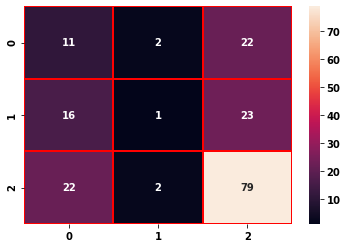

In [45]:
#prediction
y_pred = classifier.predict(X_test)#Accuracy

#from sklearn import metrics
print('Accuracy Score:', accuracy_score(y_test,y_pred,normalize=True))
confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,linewidths=1, linecolor='red')

In [46]:
clf=BernoulliNB()

def model(x, y, rstate):
    X_train, X_test, y_train, y_test=train_test_split(x, y,test_size=0.3, random_state=rstate)
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    acc = accuracy_score(y_test, y_pred, normalize=True)
    confm = confusion_matrix(y_test, y_pred)
    return [acc, confm]

In [47]:
rstate=-1
models = []

for enum, i in enumerate(data.columns[1:]):
    if i == 'Age' or i == 'Fare':
        continue
    y = data.iloc[:, enum+1:enum+2]
    x = data.drop(columns = y.columns)
    rstate += 1
    models.append([model(x, y, rstate), y.columns[0]])

In [48]:
for _ in models:
    print(f'{_[1]} vs All\n')
    print(f'Accuracy: {_[0][0]}')
    print(f'Confusion Matrix: \n {_[0][1]}\n')
    print(f"Out of total 267 records only {np.trace(_[0][1])} are successfully classified, giving a model accuracy of {int(_[0][0]*100)}%.")
    print('\n-----------------------\n')

Pclass vs All

Accuracy: 0.5917602996254682
Confusion Matrix: 
 [[ 30   8  32]
 [  9  10  30]
 [ 24   6 118]]

Out of total 267 records only 158 are successfully classified, giving a model accuracy of 59%.

-----------------------

Sex vs All

Accuracy: 0.7602996254681648
Confusion Matrix: 
 [[ 48  49]
 [ 15 155]]

Out of total 267 records only 203 are successfully classified, giving a model accuracy of 76%.

-----------------------

SibSp vs All

Accuracy: 0.6891385767790262
Confusion Matrix: 
 [[167  25   0   0   0   0   0]
 [ 31  17   0   0   0   0   0]
 [  5   7   0   0   0   0   0]
 [  4   3   0   0   0   0   0]
 [  2   2   0   0   0   0   0]
 [  0   1   0   0   0   0   0]
 [  1   2   0   0   0   0   0]]

Out of total 267 records only 184 are successfully classified, giving a model accuracy of 68%.

-----------------------

Parch vs All

Accuracy: 0.7191011235955056
Confusion Matrix: 
 [[183  16   0   0   0]
 [ 34   9   0   0   0]
 [ 18   3   0   0   0]
 [  2   0   0   0   0]
 [  